<a href="https://colab.research.google.com/github/sarathkumar1304/Spam_or_Ham_prediction/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import re

In [131]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [132]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Data Cleaning

In [133]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [134]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [135]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [136]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [137]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [138]:
#check for duplicate values
df.duplicated().sum()

403

In [139]:
df=df.drop_duplicates(keep='first')

# EDA

In [140]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

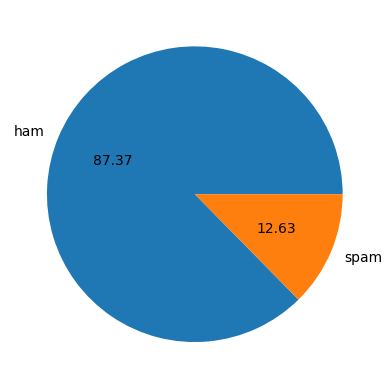

In [141]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [142]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
df['num_character'] = df['text'].apply(len)
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [144]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [145]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [146]:
df['num_sentence']=df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [147]:
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [148]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [149]:
df[df['target']==0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [150]:
df[df['target']==1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [151]:
import seaborn as sns


<Axes: xlabel='num_character', ylabel='Count'>

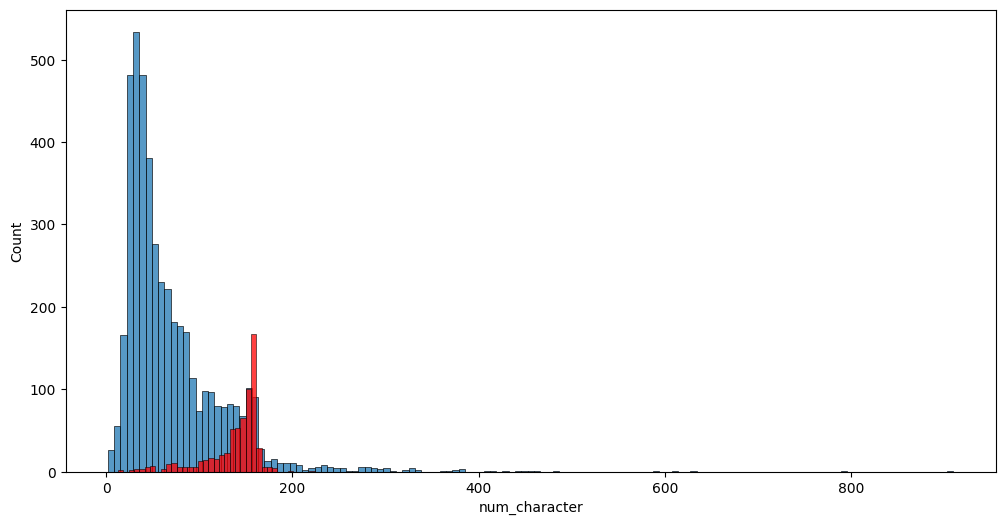

In [152]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

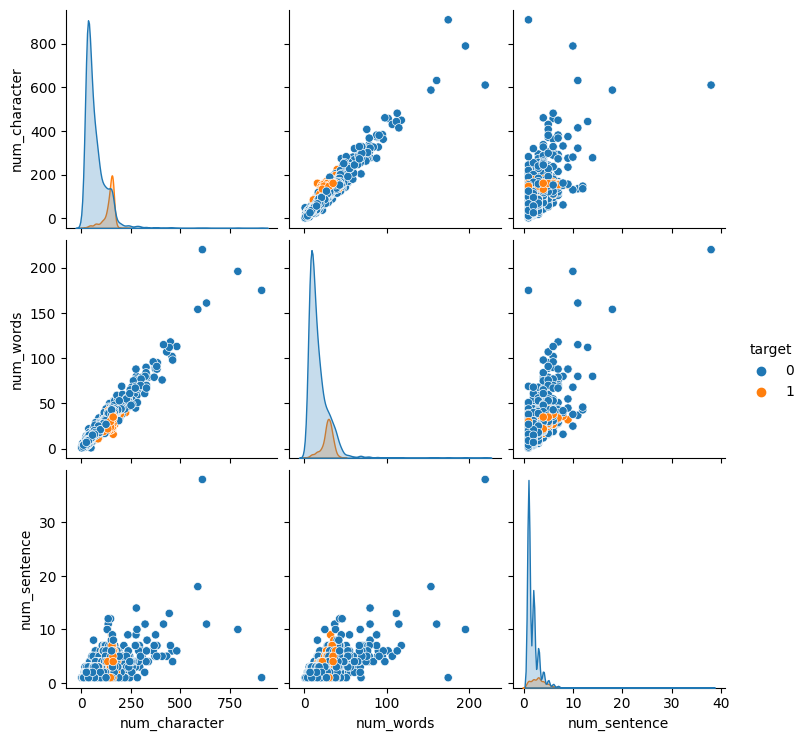

In [153]:
sns.pairplot(df,hue='target')

<ipython-input-154-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

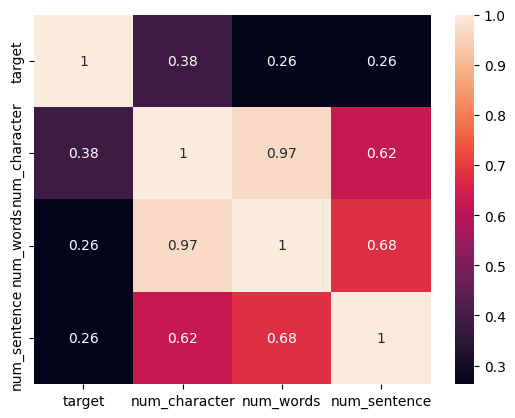

In [154]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [155]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [156]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  
  return " ".join(y)

In [157]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [158]:
df['transform_text']=df["text"].apply(transform_text)

In [159]:
df.head()

,target,text,num_character,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [160]:
from wordcloud import WordCloud

In [161]:
wc=WordCloud(width=500,height=500, min_font_size=10, background_color='white')

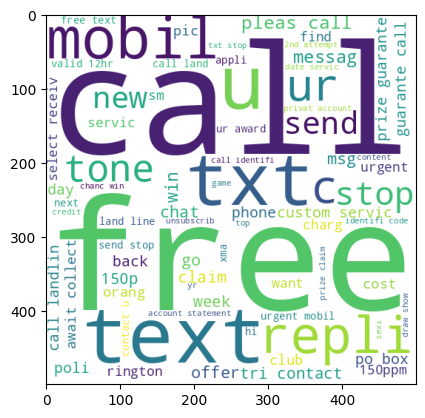

In [162]:
spam_wc=wc.generate(df[df['target']==1]["transform_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

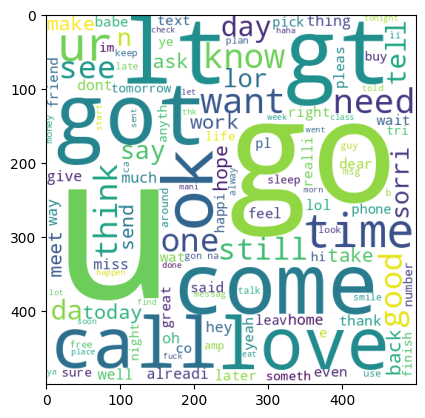

In [163]:
ham_wc=wc.generate(df[df['target']==0]["transform_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [164]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [165]:
len(spam_corpus)

9939

In [166]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [167]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [168]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [169]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [170]:
x.shape

(5169, 3000)

In [171]:
y=df['target'].values

In [172]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [173]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [174]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [175]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [176]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("acc_score : " ,accuracy_score(y_test,y_pred))
print()
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred))
print()
print("precision_score :",precision_score(y_test,y_pred))


acc_score :  0.8694390715667312

Confusion_matrix :
[[788 108]
 [ 27 111]]

precision_score : 0.5068493150684932


In [177]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print("acc_score : " ,accuracy_score(y_test,y_pred1))
print()
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred1))
print()
print("precision_score :",precision_score(y_test,y_pred1))


acc_score :  0.9709864603481625

Confusion_matrix :
[[896   0]
 [ 30 108]]

precision_score : 1.0


In [178]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print("acc_score : " ,accuracy_score(y_test,y_pred2))
print()
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred2))
print()
print("precision_score :",precision_score(y_test,y_pred2))


acc_score :  0.9835589941972921

Confusion_matrix :
[[895   1]
 [ 16 122]]

precision_score : 0.991869918699187


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [180]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [181]:
clfs= {
    'SVC' :SVC(kernel='sigmoid',gamma=1.0),
    "KN" :KNeighborsClassifier(),
    "NB" : MultinomialNB(),
    "DT" :DecisionTreeClassifier(max_depth=5) ,
    "LR" :LogisticRegression(solver='liblinear',penalty='l1'),
    "RF" : RandomForestClassifier(n_estimators=50,random_state=2),
    "AdaBoost" :AdaBoostClassifier(n_estimators=50,random_state=2),
    "BGC" : BaggingClassifier(n_estimators=50,random_state=2),
    "ETC":ExtraTreesClassifier(n_estimators=50,random_state=2),
    "GBDT":GradientBoostingClassifier(n_estimators=50,random_state=2) ,
    "XGB":XGBClassifier(n_estimators=50,random_state=2)

}

In [182]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


clfs= {
    'SVC' :SVC(kernel='sigmoid',gamma=1.0),
    "KN" :KNeighborsClassifier(),
    "NB" : MultinomialNB(),
    "DT" :DecisionTreeClassifier(max_depth=5) ,
    "LR" :LogisticRegression(solver='liblinear',penalty='l1'),
    "RF" : RandomForestClassifier(n_estimators=50,random_state=2),
    "AdaBoost" :AdaBoostClassifier(n_estimators=50,random_state=2),
    "BGC" : BaggingClassifier(n_estimators=50,random_state=2),
    "ETC":ExtraTreesClassifier(n_estimators=50,random_state=2),
    "GBDT":GradientBoostingClassifier(n_estimators=50,random_state=2) ,
    "XGB":XGBClassifier(n_estimators=50,random_state=2)

}
accuracy_list = []
precision_list = []

# Train and evaluate each classifier
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    accuracy_list.append(current_accuracy)
    precision_list.append(current_precision)
    print(f"For {name}: Accuracy = {current_accuracy}, Precision = {current_precision}")

For SVC: Accuracy = 0.9758220502901354, Precision = 0.9747899159663865
For KN: Accuracy = 0.9052224371373307, Precision = 1.0
For NB: Accuracy = 0.9709864603481625, Precision = 1.0
For DT: Accuracy = 0.9294003868471954, Precision = 0.8282828282828283
For LR: Accuracy = 0.9584139264990329, Precision = 0.9702970297029703
For RF: Accuracy = 0.9758220502901354, Precision = 0.9829059829059829
For AdaBoost: Accuracy = 0.960348162475822, Precision = 0.9292035398230089
For BGC: Accuracy = 0.9584139264990329, Precision = 0.8682170542635659
For ETC: Accuracy = 0.9748549323017408, Precision = 0.9745762711864406
For GBDT: Accuracy = 0.9468085106382979, Precision = 0.9191919191919192
For XGB: Accuracy = 0.9671179883945842, Precision = 0.9333333333333333


In [183]:
dff = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy": accuracy_list, "Precision": precision_list})


In [184]:
dff

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.929400,0.828283
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BGC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


# Voting classifier

In [189]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [190]:
voting=VotingClassifier(estimators=[("svm",svc),('nb',mnb),('et',etc)],voting='hard')

In [191]:
voting.fit(x_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [192]:
y_pred=voting.predict(x_test)
print("Accuracy  :",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))

Accuracy  : 0.9787234042553191
Precision : 1.0


# Applying Stacking

In [193]:
estimators=[("svm",svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [195]:
from sklearn.ensemble import StackingClassifier

In [198]:
clff=StackingClassifier(estimators=estimators,final_estimator=final_estimator)